# <div align="center">  **Maternal Health Risk: Analysis and modeling** <div>

# Foreword <br>
This work is intended for novices and specialists in data science, I didn't comment on the results but rather technical.


## About the Maternal Health Risk dataset
The data set was downloaded from machine learning repository ([link](https://archive.ics.uci.edu/ml/datasets/Maternal+Health+Risk+Data+Set#)).


# Methodology and tools
 
### Methodology
The approach undertacken in this study is as follows:
1. Collecting
1. Understanding
1. Cleaning and wrangling
1. Exploratory Data Analysis (EDA)
1. Modeling 


### Tools
* Python (Libraries: Pandas, Numpy, Sklearn, Matplotlib)
* Machine Learning Models: Logistic regression, SVM,KNN, Random Forest, Decision Tree) 

**Python Libraries** <br>
Let call the python libraries we need.

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Datetime is a library that allows us to represent dates
import seaborn as sns




import matplotlib.pyplot as plt

# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression

# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

# Collecting **Data**
Using the *Pandas* libraries will help us to load the *CSV* file. 

In [2]:
data = pd.read_csv("/kaggle/input/maternal-health-risk/Maternal_Health_Risk.csv")  

# Understanding the **Data** 
Display the data as dataframe.

In [3]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


Take a look on the number of the rows and columns

In [4]:
data.shape

(1014, 7)

In [5]:
data.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

**With *describe()* we got statistic about the features** <br>
Exemple: age mean is around 30 years.

In [6]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


Check for any missing data

In [7]:
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

**$\color{blue}{\text{No missing data.}}$**

## Correlation between variables

<AxesSubplot:>

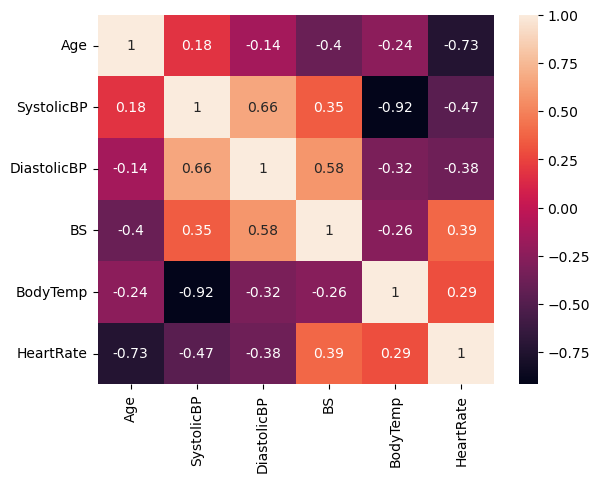

In [8]:
sns.heatmap(data[:5].corr(method ='pearson'), annot=True)

Calculate the Pearson coefficient will help us to understand the relationship between the features.

# Exploratory Data Analysis (EDA)

### Overview

We have three classes (high risk, mid risk, low risk) <br>
Let see the proportion

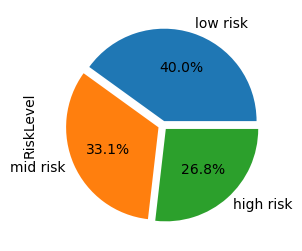

In [9]:
data['RiskLevel'].value_counts().plot.pie( explode = [0.05,0.05,0.05],autopct = '%1.1f%%', shadow = False, figsize = (7,3))
plt.show()

The dataset is not imbalanced.

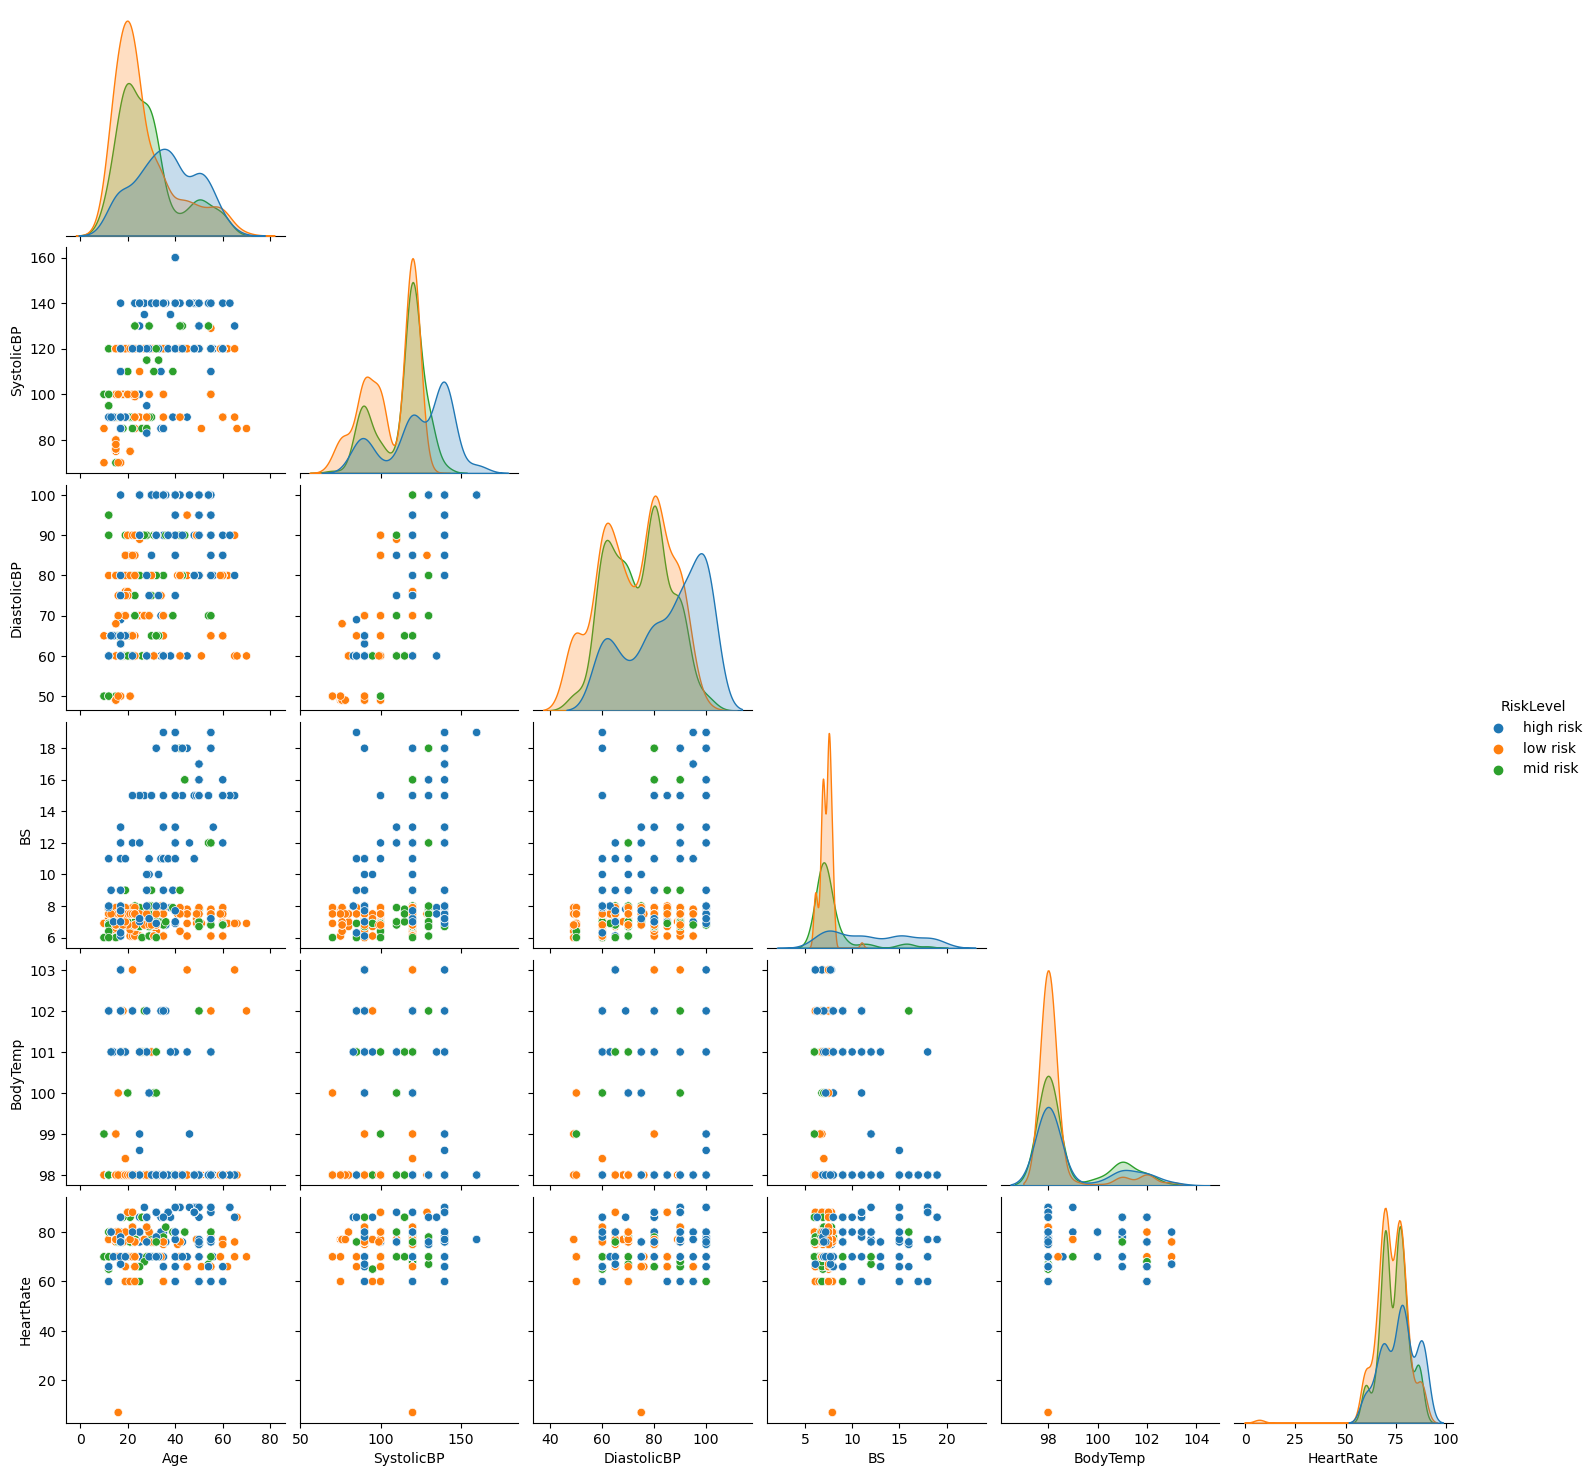

In [10]:
sns.pairplot(data, hue='RiskLevel',  corner=True)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 25.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 25.6% of the points cannot be placed; y

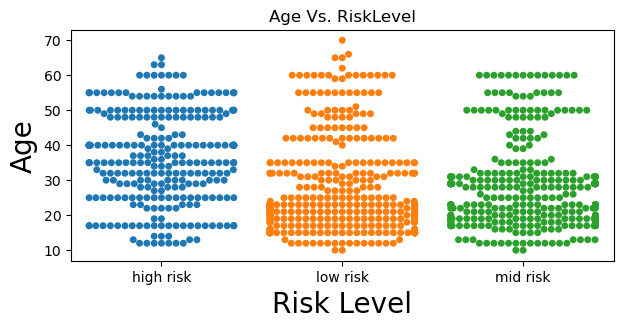

In [11]:
plt.figure(figsize = (7,3))

sns.swarmplot(data=data, x="RiskLevel", y="Age", hue="RiskLevel", legend=False)
plt.title("Age Vs. RiskLevel")
plt.xlabel("Risk Level",fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.show()

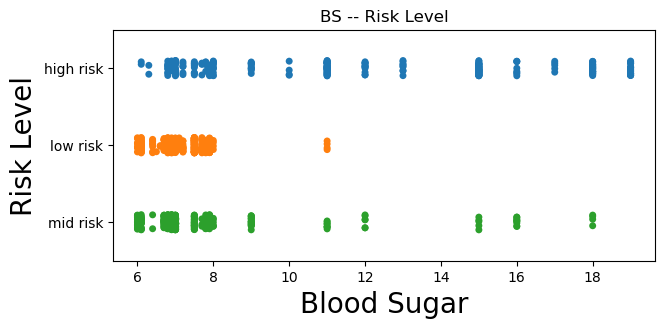

In [12]:
plt.figure(figsize = (7,3))
sns.stripplot(data=data, x="BS", y="RiskLevel", hue="RiskLevel", legend=False)

plt.title("BS -- Risk Level")
plt.xlabel("Blood Sugar",fontsize=20)
plt.ylabel("Risk Level",fontsize=20)
plt.show()

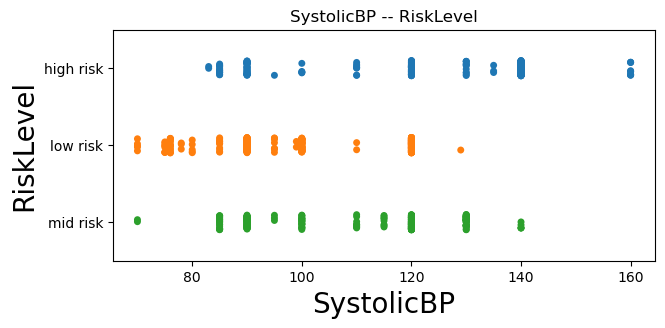

In [13]:
plt.figure(figsize = (7,3))
sns.stripplot(data=data, x="SystolicBP", y="RiskLevel", hue="RiskLevel", legend=False)

plt.title("SystolicBP -- RiskLevel")
plt.xlabel("SystolicBP",fontsize=20)
plt.ylabel("RiskLevel",fontsize=20)
plt.show()

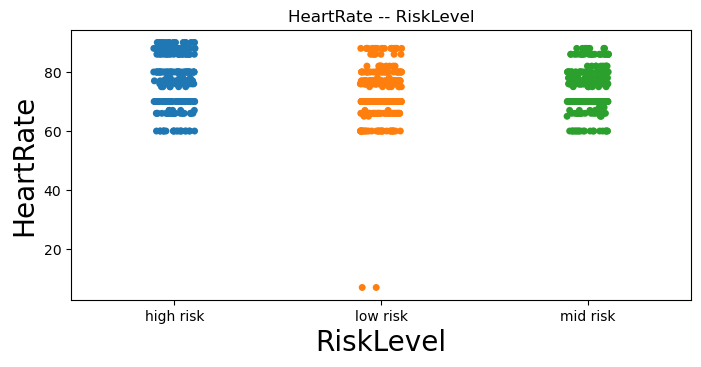

In [14]:
plt.figure(figsize = (8,3.5))
sns.stripplot(data=data, x="RiskLevel", y="HeartRate", hue="RiskLevel", legend=False)

plt.title("HeartRate -- RiskLevel")
plt.xlabel("RiskLevel",fontsize=20)
plt.ylabel("HeartRate",fontsize=20)
plt.show()

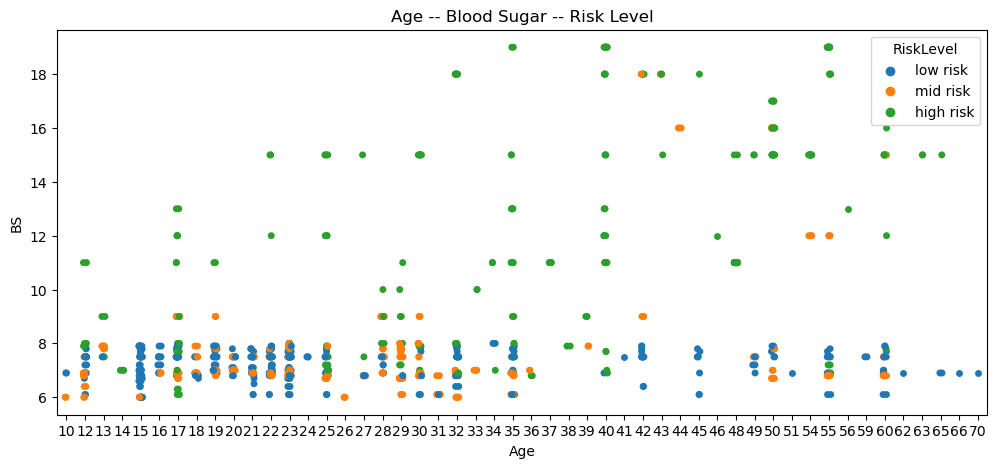

In [15]:
plt.figure(figsize = (12,5))
sns.stripplot(x = "Age",y="BS", hue = "RiskLevel",data = data)
plt.title("Age -- Blood Sugar -- Risk Level")
plt.show()

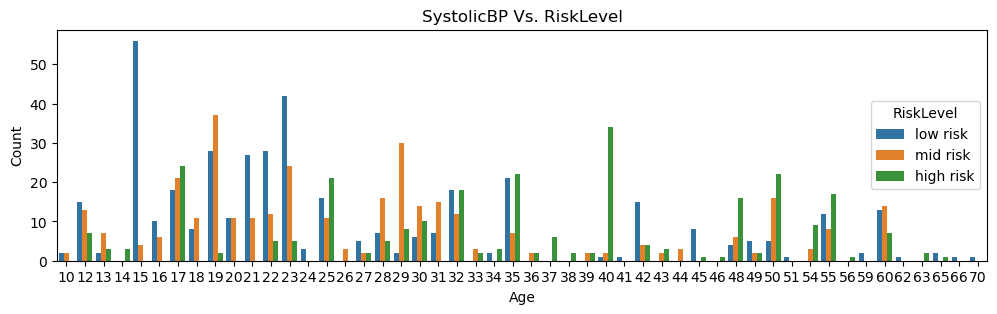

In [16]:
df_SystolicBP = data.groupby(["Age","RiskLevel"]).size().reset_index(name = "Count")
plt.figure(figsize = (12,3))
fig=sns.barplot(x = "Age",y="Count", hue = "RiskLevel",data = df_SystolicBP)
sns.move_legend(fig,"right")
plt.title("SystolicBP Vs. RiskLevel")
plt.show()

# Modeling

As you can notice, the classes are: high risk and Mid risk and Low risk <br>
Important job is to convert these classes into a numbers as follows: 0, 1, 2 <br>
Label encoder can do this simply and fastly.

$\color{red}{\text{Before encoding}}$

In [17]:
data['RiskLevel']

0       high risk
1       high risk
2       high risk
3       high risk
4        low risk
          ...    
1009    high risk
1010    high risk
1011    high risk
1012    high risk
1013     mid risk
Name: RiskLevel, Length: 1014, dtype: object

$\color{red}{\text{After encoding}}$

In [18]:
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
le.fit(data['RiskLevel'])
LabelEncoder()
list(le.classes_)
Risk_Encoded=le.transform(data['RiskLevel'])
pd.Series(Risk_Encoded) 
print(Risk_Encoded)

[0 0 0 ... 0 0 2]


$\color{red}{\text{New labeling: }}$ <br>
* High risk --> 0
* Low risk  --> 1
* Mid Risk  --> 2

Next step is to split the dataset into training data and testing data.

In [19]:
data_1 = data.drop(['RiskLevel'], axis=1)
# Labels for the sample data
labels = pd.Series(Risk_Encoded) 



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_1, labels, test_size=0.2)

$\color{red}{\text{Scaling/Normalizing }}$ <br>
Useful when many models are applied.

In [20]:
from sklearn.preprocessing import StandardScaler

#  scalling/normalizing
sc = StandardScaler()
sc.fit(X_train)

x_train = sc.transform(X_train)
x_test = sc.transform(X_test)

### Train the models

First, let import all libriraries needed for modeling

In [21]:
#Import the libraries needed for modeling
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## SVC model

Let's begin with **SVC**, support vector classification for multiclass.<br>
As we know **SVM** (support vector machine) is used for binary class, 

In [22]:
rbf = SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
rbf_pred =rbf.predict(X_test)
poly_pred = poly.predict(X_test)

print("Rbf Accuracy:" ,  accuracy_score(y_test, rbf_pred ))

print("___________________________________________")
      
report_rbf= classification_report(y_test, rbf_pred)
print(report_rbf)
      
print("___________________________________________")

print("Poly Accuracy:" , accuracy_score(y_test, poly_pred))

print("___________________________________________")
report_poly = classification_report(y_test, poly_pred)
print( report_poly )

Rbf Accuracy: 0.4975369458128079
___________________________________________
              precision    recall  f1-score   support

           0       0.77      0.16      0.27        62
           1       0.47      0.90      0.62        91
           2       0.56      0.18      0.27        50

    accuracy                           0.50       203
   macro avg       0.60      0.41      0.39       203
weighted avg       0.58      0.50      0.43       203

___________________________________________
Poly Accuracy: 0.6699507389162561
___________________________________________
              precision    recall  f1-score   support

           0       0.81      0.69      0.75        62
           1       0.68      0.86      0.76        91
           2       0.43      0.30      0.35        50

    accuracy                           0.67       203
   macro avg       0.64      0.62      0.62       203
weighted avg       0.66      0.67      0.65       203



$\color{red}{\text{Notice: }}$ 
We used two different **kernel**, as we can notice the **accuracy** depend on the kernel used. <br>
For our case, the **poly** kernel gives better accuracy than **rbf** kernel.

#### Confusion Matrix

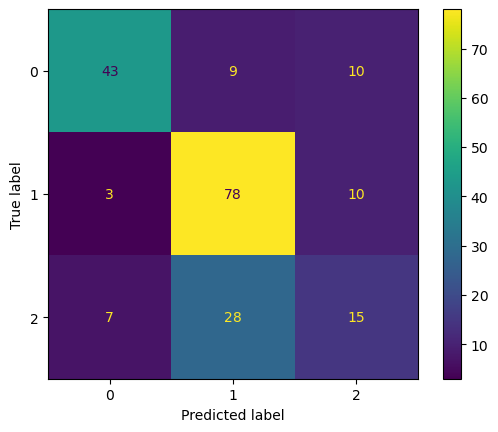

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test, poly_pred)

plt.show()

## Decision tree classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=0)
dtc=clf.fit(X_train, y_train)
DTC =clf.predict(X_test)
print(cross_val_score(clf, X_train, y_train, cv=10))
print("Decision tree Accuracy:" , accuracy_score(y_test, DTC))
report_Decision_Tree = classification_report(y_test, DTC)
print( report_Decision_Tree )


[0.80487805 0.82716049 0.79012346 0.77777778 0.85185185 0.75308642
 0.82716049 0.81481481 0.79012346 0.80246914]
Decision tree Accuracy: 0.812807881773399
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        62
           1       0.92      0.71      0.80        91
           2       0.61      0.84      0.71        50

    accuracy                           0.81       203
   macro avg       0.81      0.83      0.81       203
weighted avg       0.84      0.81      0.82       203



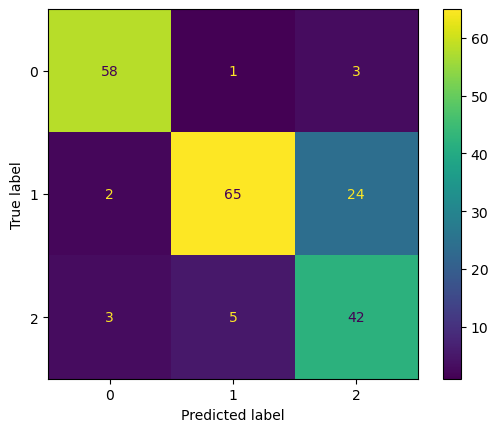

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, DTC)

plt.show()

## k-Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
KNN=knn.fit(X_train, y_train)
knn_predict =knn.predict(X_test)

print("KNN Accuracy:" , accuracy_score(y_test, knn_predict))
report_KNN = classification_report(y_test, knn_predict)
print( report_KNN)


KNN Accuracy: 0.7093596059113301
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        62
           1       0.77      0.65      0.70        91
           2       0.55      0.68      0.61        50

    accuracy                           0.71       203
   macro avg       0.70      0.72      0.71       203
weighted avg       0.72      0.71      0.71       203



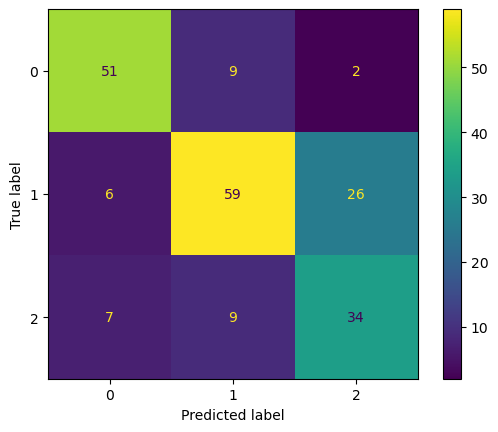

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_predict)

## Random Forest Classifier

In [28]:
#Import the random forest classifier librariy
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=2,n_estimators = 10, criterion = 'entropy', random_state = 42)
RFC=rfc.fit(X_train, y_train)
rfc_predict =rfc.predict(X_test)

print("DRandom Forest Accuracy:" , accuracy_score(y_test, rfc_predict))
report_RFC = classification_report(y_test, rfc_predict)
print( report_RFC)


DRandom Forest Accuracy: 0.6945812807881774
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        62
           1       0.72      0.87      0.79        91
           2       0.38      0.22      0.28        50

    accuracy                           0.69       203
   macro avg       0.63      0.64      0.62       203
weighted avg       0.66      0.69      0.67       203



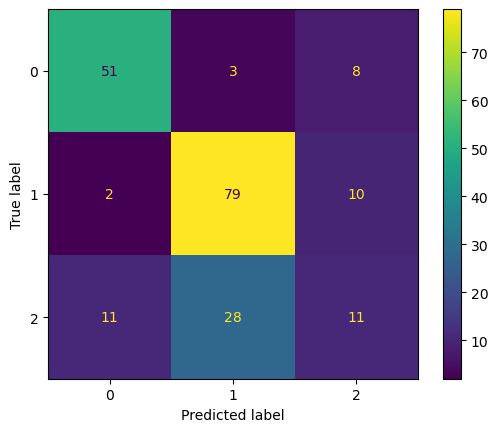

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test, rfc_predict)

## Gradient Boosting Classifier

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
GBC=gbc.fit(X_train, y_train)
gbc_predict =gbc.predict(X_test)

print("Gradient Boosting Accuracy:" , accuracy_score(y_test, gbc_predict))
report_GBC = classification_report(y_test, gbc_predict)
print( report_GBC)

Gradient Boosting Accuracy: 0.7536945812807881
              precision    recall  f1-score   support

           0       0.85      0.84      0.85        62
           1       0.85      0.74      0.79        91
           2       0.54      0.68      0.60        50

    accuracy                           0.75       203
   macro avg       0.75      0.75      0.75       203
weighted avg       0.77      0.75      0.76       203



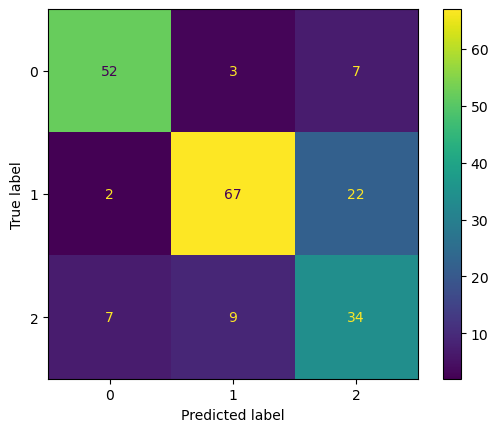

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, gbc_predict)

## Comparative study between models

### Print the scores

In [32]:
models = [poly, dtc, KNN, RFC, GBC]
model_names = ['SVC', 'Decision tree', 'K-Nearest Neighbors', 'Random forest', 'Grandient boosting']

for i in range(len(models)):
    print(f'{model_names[i]} score on train data : {models[i].score(X_train, y_train)}')
    print(f'{model_names[i]} score on test data : {models[i].score(X_test, y_test)}')
    print()

SVC score on train data : 0.6831072749691739
SVC score on test data : 0.6699507389162561

Decision tree score on train data : 0.9272503082614056
Decision tree score on test data : 0.812807881773399

K-Nearest Neighbors score on train data : 0.8803945745992602
K-Nearest Neighbors score on test data : 0.7093596059113301

Random forest score on train data : 0.6313193588162762
Random forest score on test data : 0.6945812807881774

Grandient boosting score on train data : 0.812577065351418
Grandient boosting score on test data : 0.7536945812807881



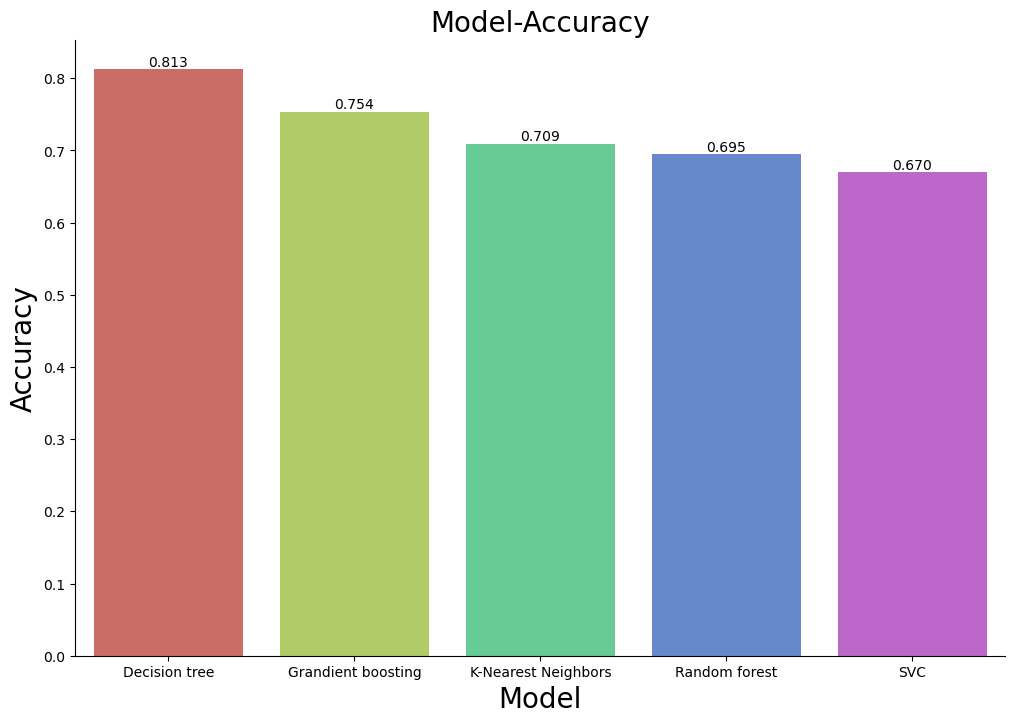

In [33]:
compare = {'Accuracy': [poly.score(X_test, y_test), dtc.score(X_test, y_test), KNN.score(X_test, y_test),RFC.score(X_test, y_test),GBC.score(X_test, y_test)]}
res = pd.DataFrame(compare, index=['SVC', 'Decision tree', 'K-Nearest Neighbors', 'Random forest', 'Grandient boosting']).sort_values(by=['Accuracy'], ascending=False)
res.round(3)

plt.figure(figsize=(12,8))
ax=sns.barplot(x=res.index, y='Accuracy', data=res, palette='hls')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xlabel('Model', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()), 
                ha='center', va='bottom',color='black')
plt.title('Model-Accuracy', fontsize=20)
plt.show()

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
cv = KFold(n_splits=10, random_state=1, shuffle=True)



models = [poly, dtc, KNN, RFC, GBC]
model_names = ['SVC', 'Decision Tree', 'K-Nearest Neighbor', 'Random Forest', 'Gradient Boosting']

for i in range(len(models)):
    model_KFold = cross_val_score(models[i], X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    print(model_names[i], 'Accuracy: %.3f (%.3f)' % (mean(model_KFold), std(model_KFold)))

SVC Accuracy: 0.664 (0.050)
Decision Tree Accuracy: 0.816 (0.039)
K-Nearest Neighbor Accuracy: 0.686 (0.049)
Random Forest Accuracy: 0.613 (0.068)
Gradient Boosting Accuracy: 0.750 (0.060)


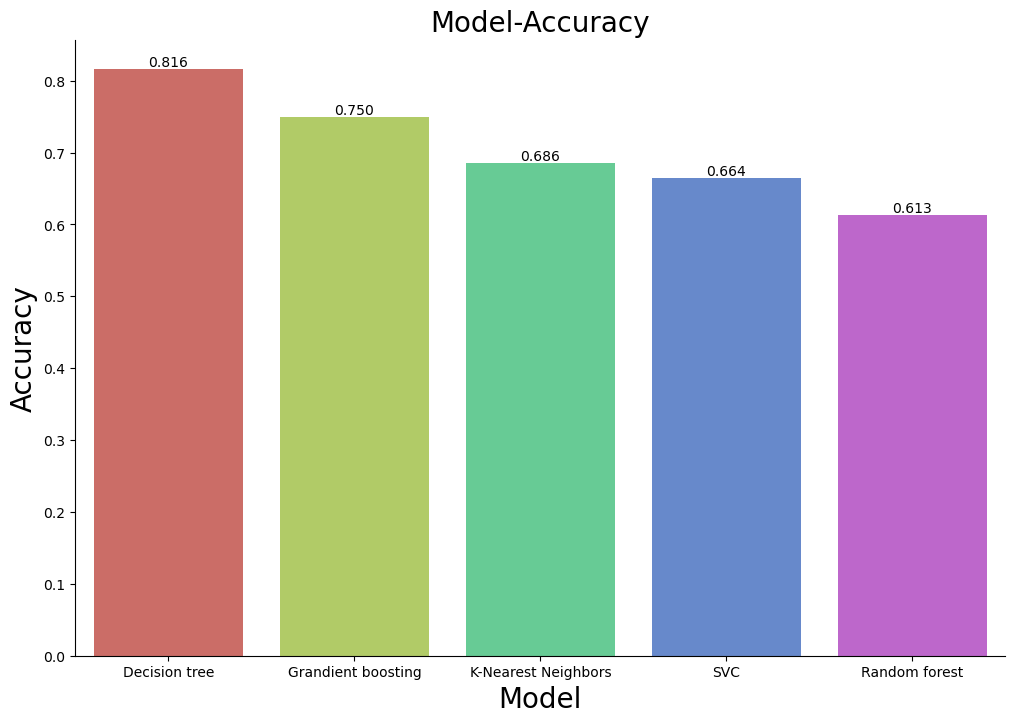

In [35]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
poly_KFold = cross_val_score(poly, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
DTC_KFold = cross_val_score(dtc, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
KNN_KFold = cross_val_score(KNN, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
RFC_KFold = cross_val_score(RFC, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
GBC_KFold = cross_val_score(GBC, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

compare_KFold = {'Accuracy_KFold': [mean(poly_KFold),mean(DTC_KFold),mean(KNN_KFold),mean(RFC_KFold),mean(GBC_KFold)]}
df_KFold = pd.DataFrame(compare_KFold, index=['SVC', 'Decision tree', 'K-Nearest Neighbors', 'Random forest', 'Grandient boosting']).sort_values(by=['Accuracy_KFold'], ascending=False)
df_KFold.round(3)

plt.figure(figsize=(12,8))
ax=sns.barplot(x=df_KFold.index, y='Accuracy_KFold', data=df_KFold, palette='hls')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xlabel('Model', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()), 
                ha='center', va='bottom',color='black')
plt.title('Model-Accuracy', fontsize=20)
plt.show()




Display the comparative figure

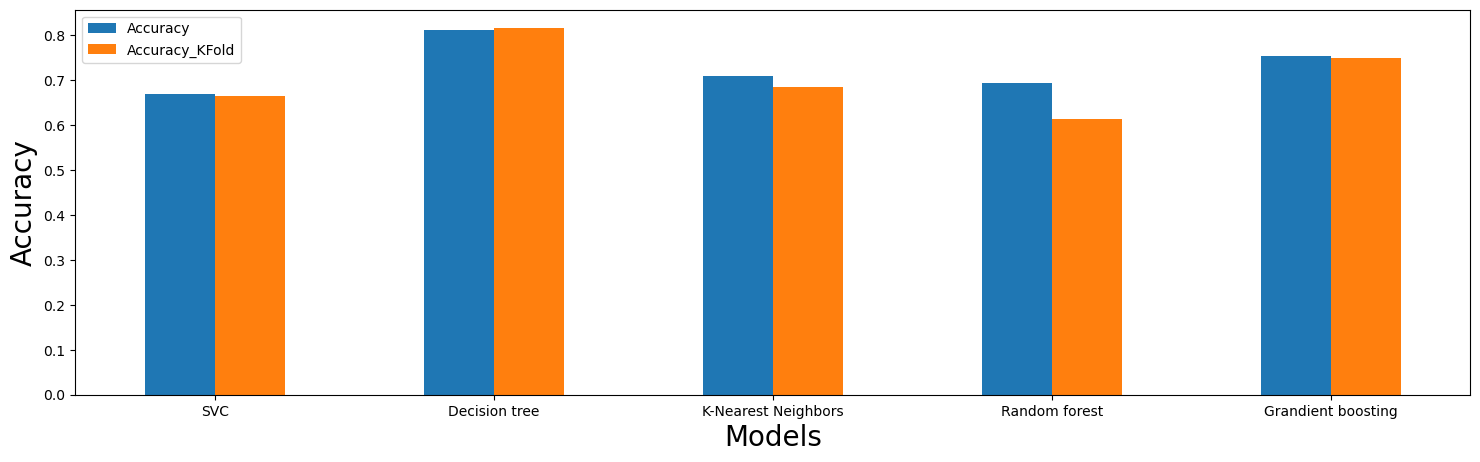

In [36]:
Accuracy = [poly.score(X_test, y_test), dtc.score(X_test, y_test), KNN.score(X_test, y_test),RFC.score(X_test, y_test),GBC.score(X_test, y_test)]
Accuracy_KFold = [mean(poly_KFold),mean(DTC_KFold),mean(KNN_KFold),mean(RFC_KFold),mean(GBC_KFold)]
index = ['SVC', 'Decision tree', 'K-Nearest Neighbors', 'Random forest', 'Grandient boosting']
df = pd.DataFrame({'Accuracy': Accuracy,'Accuracy_KFold': Accuracy_KFold}, index=index)

ax = df.plot.bar(rot=0,figsize=(18,5))
plt.xlabel('Models', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.show()

# Conclusion <br>
Among the aims of the study is to understand and analyze the dataset but the most important is to find which machine learning model will be the best. <br>   
At first glance, the dataset seems easy for medeling but the multiclass problem it's not. <br>
We used 5 multiclass  machine learning models in order to find the right model (the best model). <br> 
According to the last figure above, apparently, the Decision Tree Classifier Model will be in the podium. This model shows the highest accuracy and also the highest vlaue of accuracy with cross validation (K Fold).
